In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline


boston = load_boston()

bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF["PRICE"] = boston.target

print(bostonDF.shape)
bostonDF

(506, 14)


c:\Users\OPERATOR-70\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets includ

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(["PRICE"], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size= 0.3, random_state=156)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse,rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test,y_preds)))

print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_,4))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757
절편 값: 40.995595172164435
회귀 계수값: [-1.13000e-01  6.55000e-02  3.44000e-02  3.04590e+00 -1.97958e+01
  3.35500e+00  5.90000e-03 -1.74190e+00  3.55900e-01 -1.43000e-02
 -9.20200e-01  1.04000e-02 -5.66200e-01]


In [3]:
from sklearn.preprocessing import MinMaxScaler

# 변형 객체 생성
minmax_scaler = MinMaxScaler()

# 훈련데이터의 모수 분포 저장
minmax_scaler.fit(X_train)

# 훈련 데이터 스케일링
X_train_scaled = minmax_scaler.transform(X_train)

# 테스트 데이터의 스케일링
X_test_scaled = minmax_scaler.transform(X_test)

# 스케일링 된 결과 값으로 본래 값을 구할 수도 있다.
# X_origin = minmax_scaler.inverse_transform(X_train_scaled)

X_train_scaled = pd.DataFrame(data = X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(data = X_test_scaled, columns=X_test.columns)
y_train = pd.DataFrame(y_train)
y_train.reset_index(drop='index', inplace=True)
y_test = pd.DataFrame(y_test)
y_test.reset_index(drop='index', inplace=True)

In [4]:
X_train_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.002866,0.00,0.236437,0.0,0.122407,0.391071,0.608651,0.450863,0.086957,0.087786,0.616279,1.000000,0.399283
1,0.009748,0.00,0.281525,0.0,0.309129,0.415022,0.685891,0.242514,0.130435,0.229008,0.976744,0.984910,0.263521
2,0.007141,0.20,0.128666,0.0,0.535270,0.758574,0.890834,0.091862,0.173913,0.146947,0.046512,0.978367,0.152594
3,0.000703,0.00,0.420455,0.0,0.381743,0.654340,0.907312,0.094381,0.000000,0.164122,0.976744,1.000000,0.107892
4,0.001123,0.00,0.379399,0.0,0.049793,0.479785,0.050463,0.378079,0.130435,0.225191,0.767442,0.984809,0.104581
...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,0.001597,0.25,0.171188,0.0,0.132780,0.613336,0.417096,0.623021,0.304348,0.185115,0.825581,0.996652,0.214404
350,0.049842,0.00,0.646628,0.0,0.402490,0.527112,0.504634,0.260264,1.000000,0.914122,0.883721,0.979001,0.244205
351,1.000000,0.00,0.646628,0.0,0.601660,0.459092,1.000000,0.061199,1.000000,0.914122,0.883721,0.035126,0.521247
352,0.000150,0.95,0.081378,0.0,0.056224,0.857061,0.298661,0.362684,0.130435,0.070611,0.244186,0.983896,0.031733


C:\Users\OPERATOR-70\AppData\Local\Temp\ipykernel_12916\3722451924.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_scaled[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)])
C:\Users\OPERATOR-70\AppData\Local\Temp\ipykernel_12916\3722451924.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

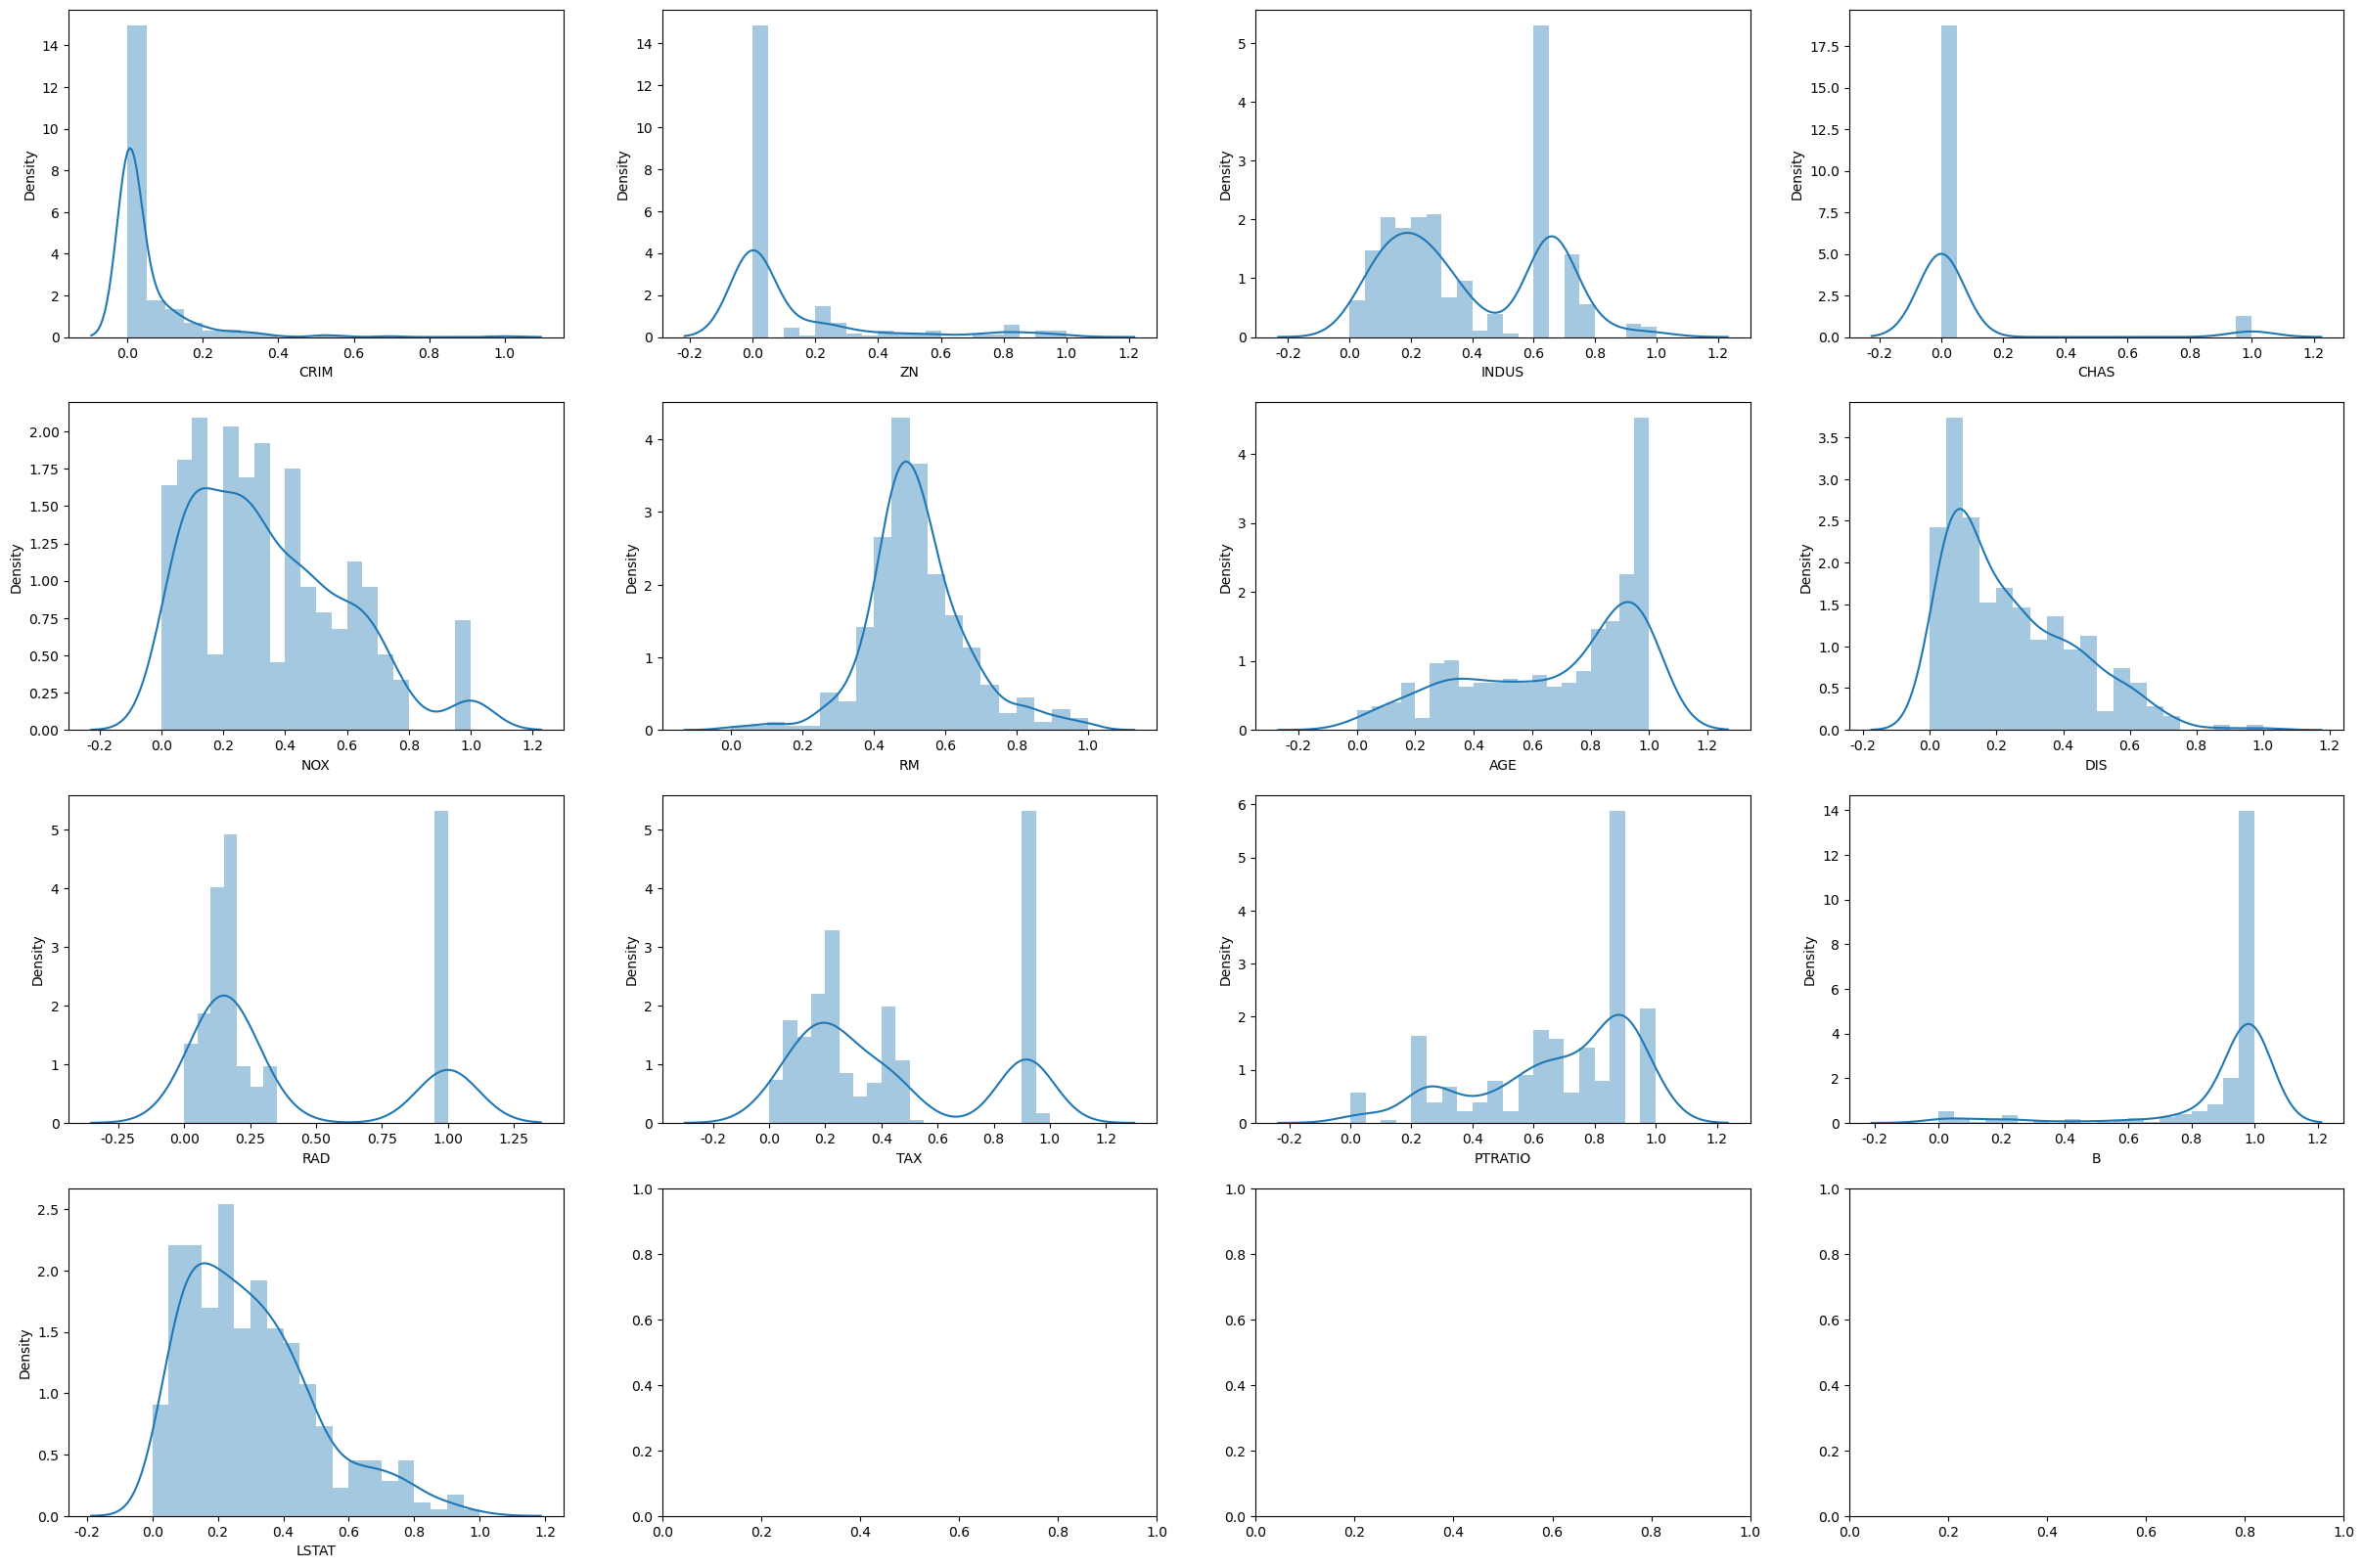

In [18]:
# histogram
col_n = 4
row_n = 4

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(X_train_scaled.columns):
    sns.distplot(X_train_scaled[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)])

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


CRIM
ZN
INDUS
CHAS
NOX
RM
AGE
DIS
RAD
TAX
PTRATIO
B
LSTAT


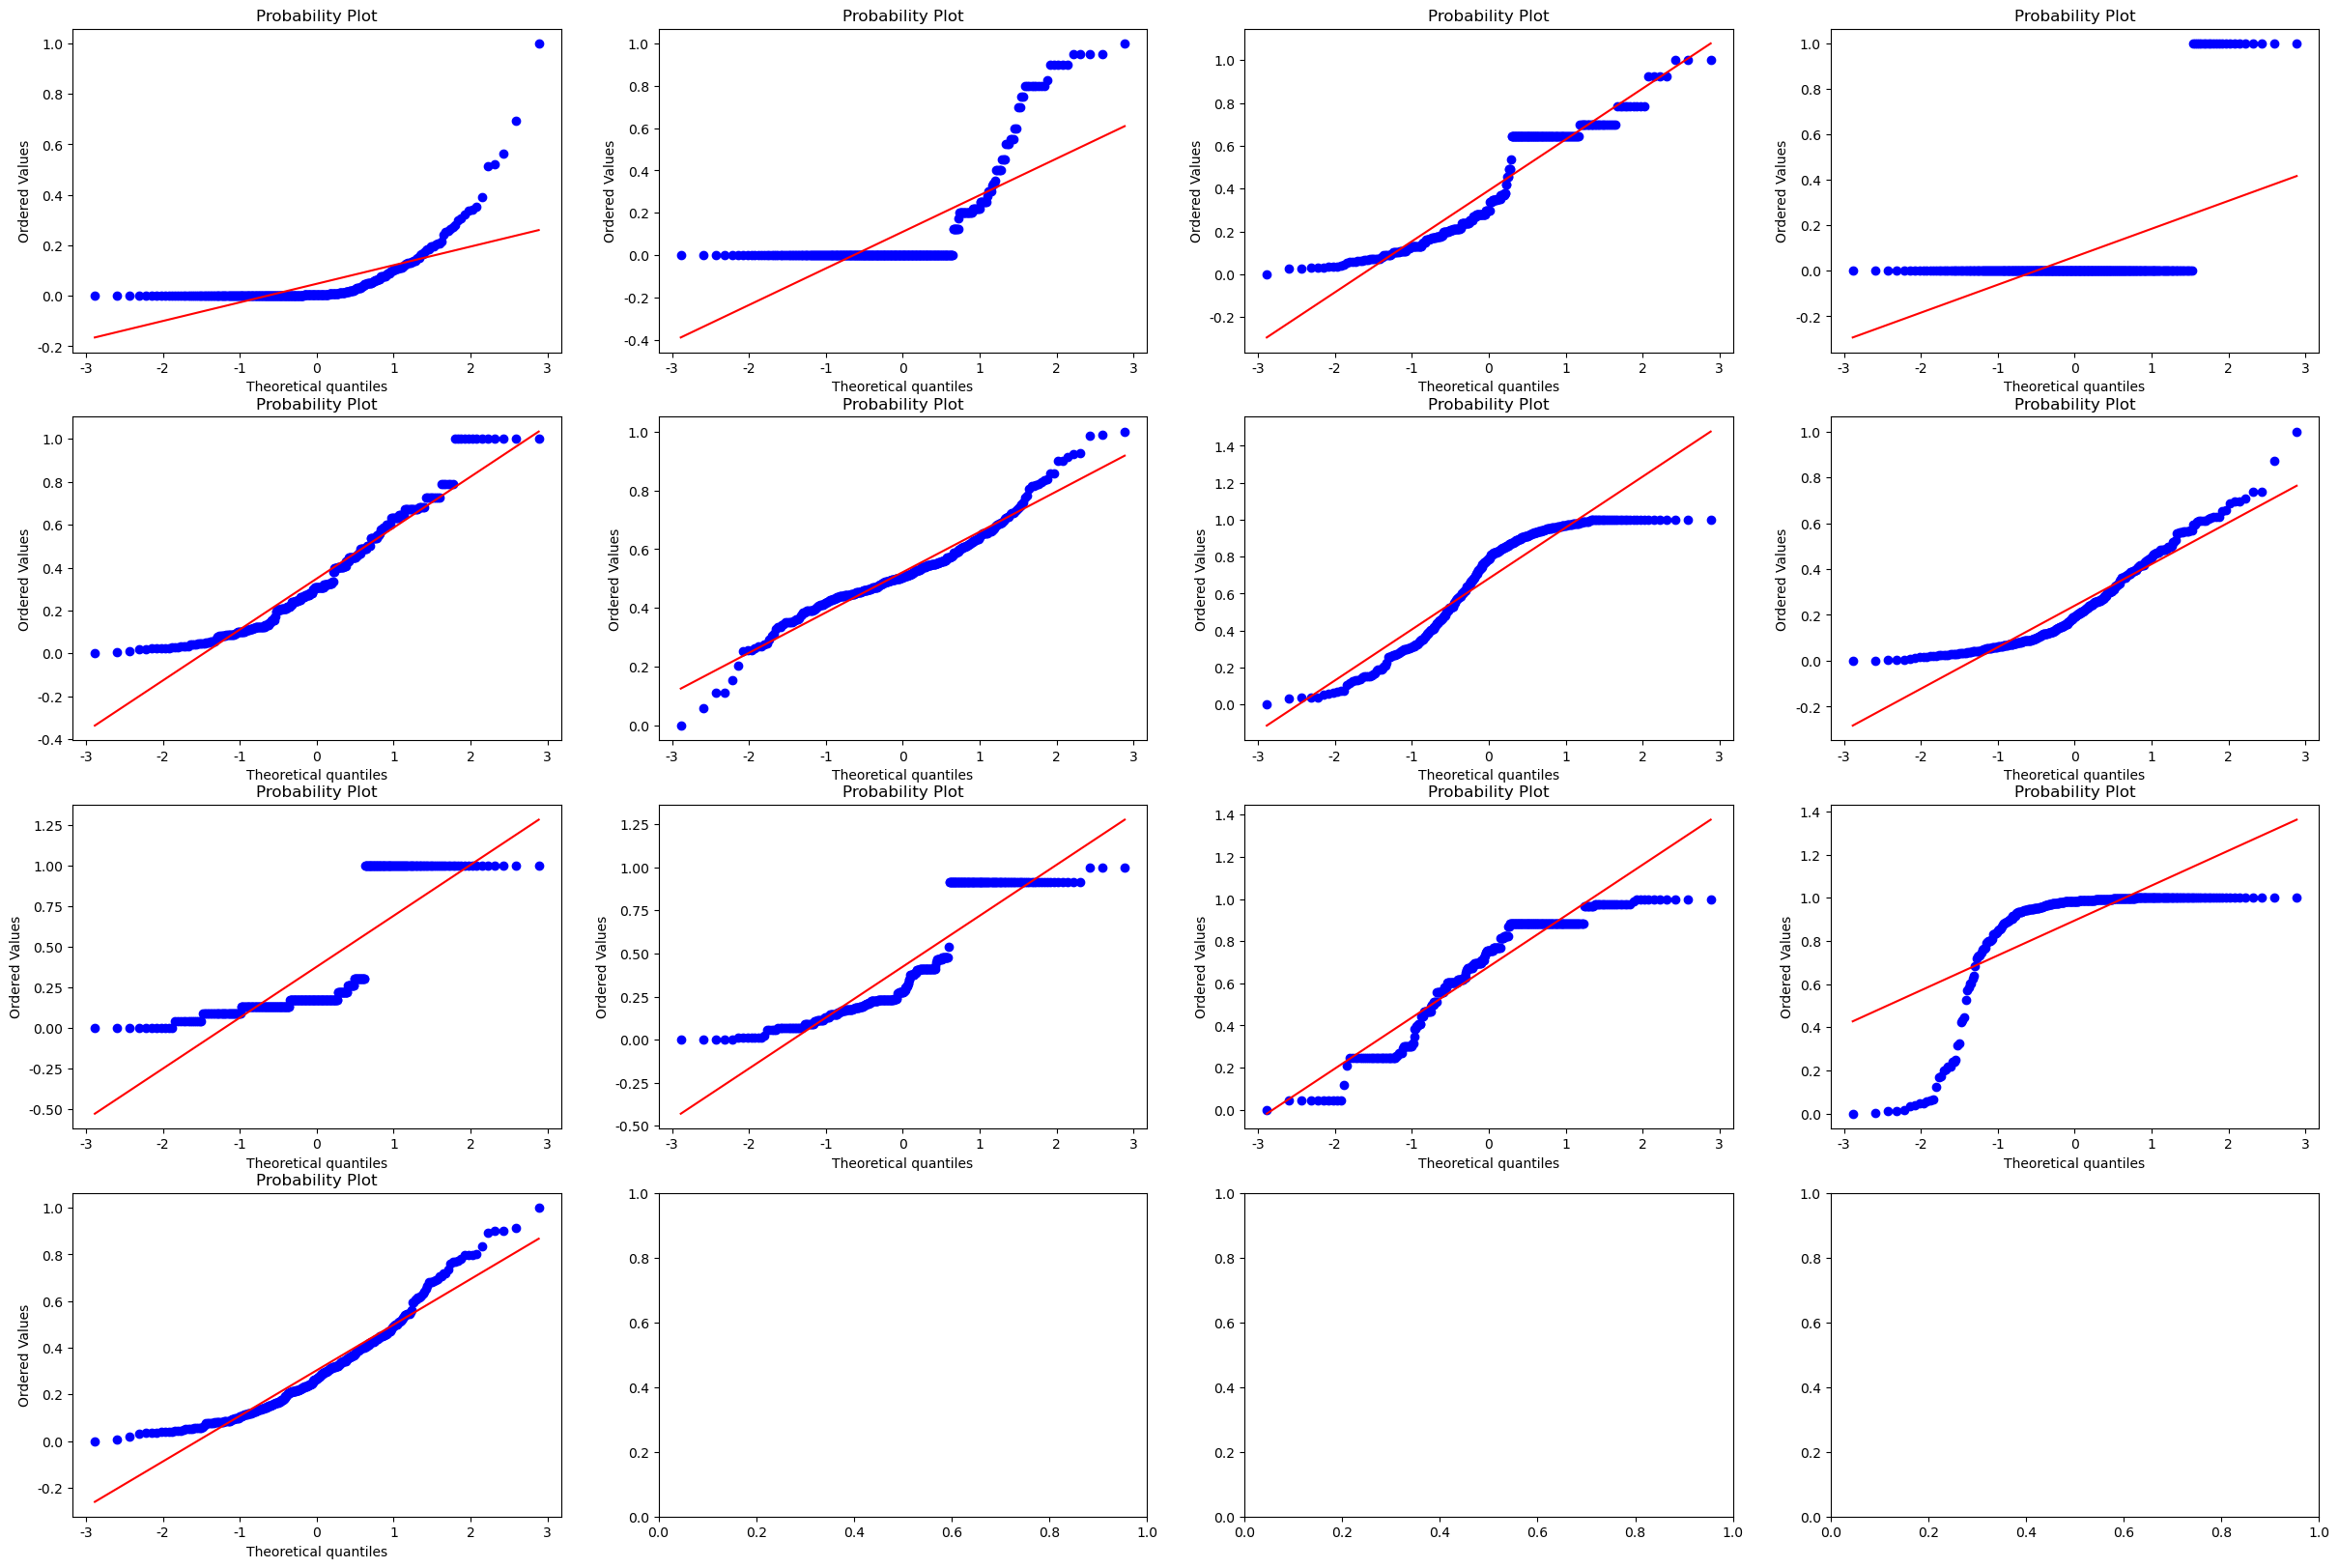

In [19]:
# histogram
col_n = 4
row_n = 4

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(X_train_scaled.columns):
    stats.probplot(X_train_scaled[col],dist=stats.norm, plot=ax[int(i/col_n),int(i%col_n)])
    print(col)

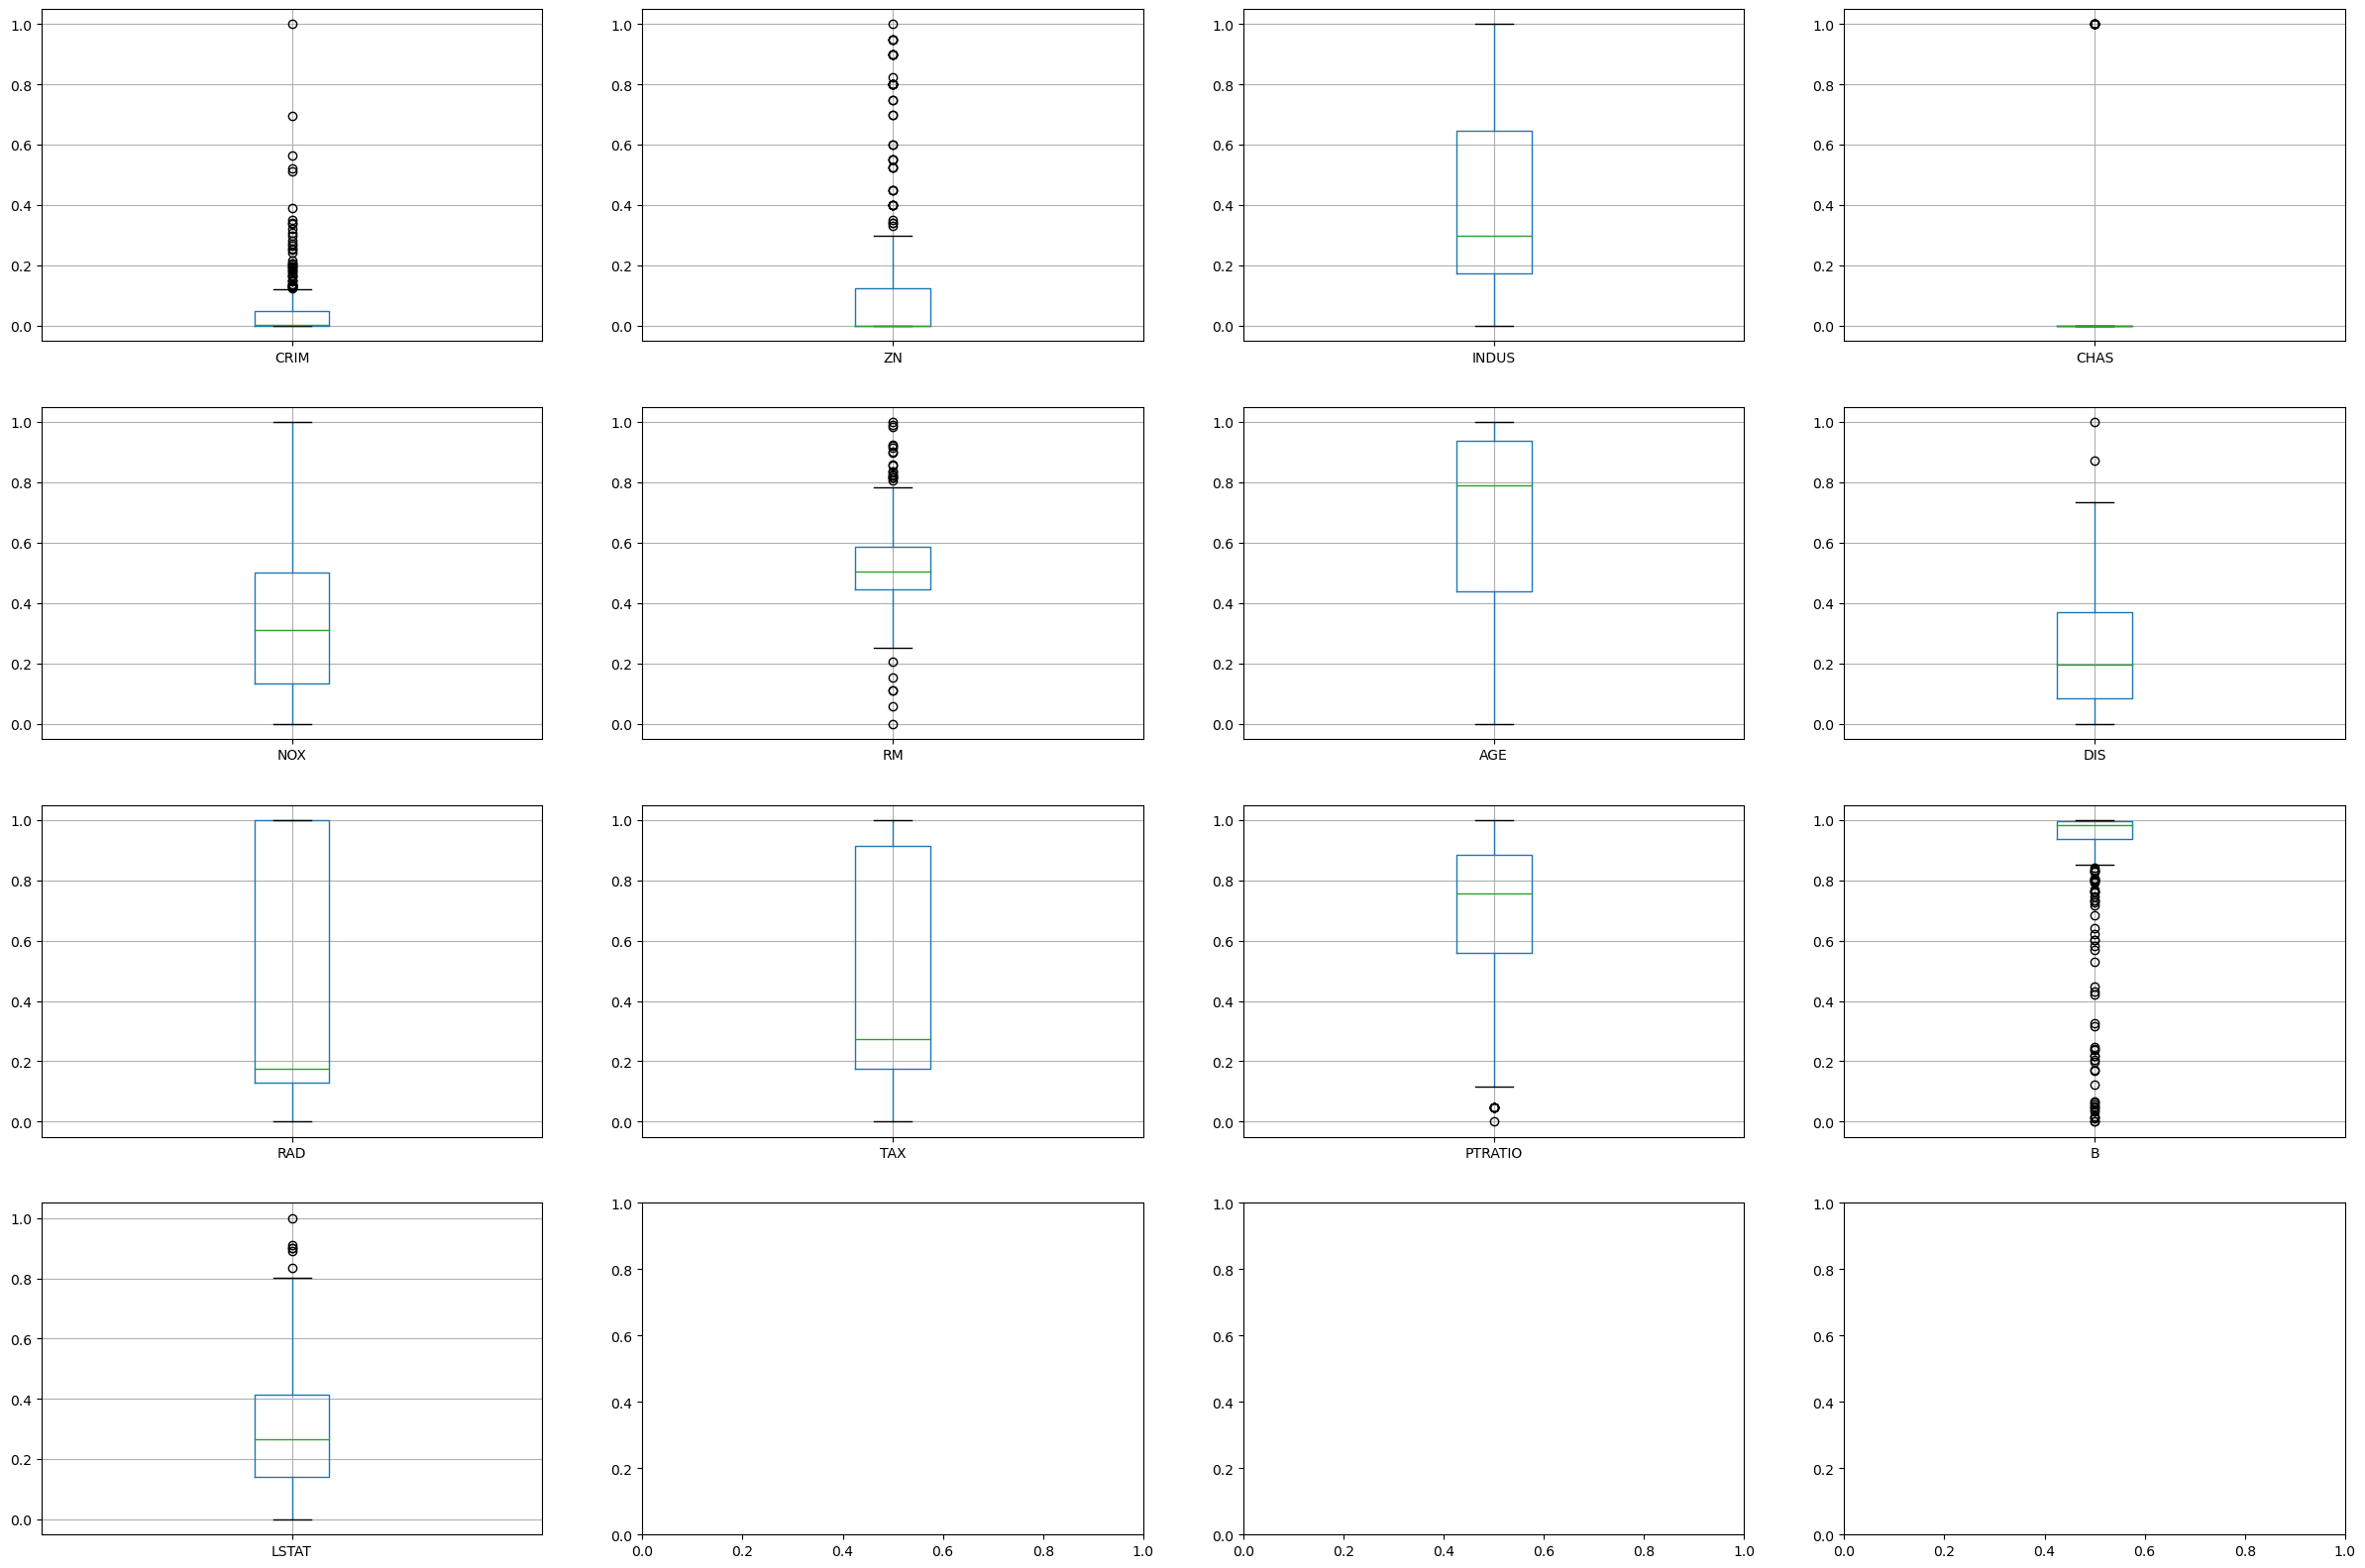

In [20]:
from matplotlib import rc 
col_n = 4
row_n = 4

# stats.probplot(df["대비_국고1년"], dist=stats.norm, plot=plt)
# plt.show()
fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(X_train_scaled.columns):
    X_train_scaled.boxplot(column=col,ax=ax[int(i/col_n),int(i%col_n)])

In [21]:
import statsmodels.api as sm

feature_add = sm.add_constant(X_train_scaled,  has_constant='add')

# sm OLS 적합
model = sm.OLS(y_train , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     69.77
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           1.42e-87
Time:                        16:36:14   Log-Likelihood:                -1068.0
No. Observations:                 354   AIC:                             2164.
Df Residuals:                     340   BIC:                             2218.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.4424      2.930      9.707      0.000      22.679      34.206
CRIM          -8.3068      3.758     -2.210      0.028     -15.700      -0.914
ZN             6.5512      1.722      3.804      0.000       3.164       9.939
INDUS          0.9394      2.231      0.421      0.674      -3.449       5.328
CHAS           3.0459      1.149      2.651      0.008       0.786       5.306
NOX           -9.5416      2.297     -4.153      0.000     -14.061      -5.022
RM            17.5096      2.646      6.618      0.000      12.306      22.713
AGE            0.5765      1.572      0.367      0.714      -2.515       3.668
DIS          -19.1550      2.760     -6.941      0.000     -24.583     -13.727
RAD            8.1853      1.972      4.151      0.000       4.307      12.064
TAX           -7.4908      2.579     -2.904      0.004     -12.564      -2.418
PTRATIO       -7.9135      1.450     -5.456      0.000     -10.766      -5.061
B              4.0994      1.396      2.937      0.004       1.354       6.845
LSTAT        -20.5184      2.178     -9.421      0.000     -24.802     -16.235
==============================================================================
Omnibus:                      110.816   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              364.560
Skew:                           1.390   Prob(JB):                     6.87e-80
Kurtosis:                       7.122   Cond. No.                         31.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# X_train_scaled = X_data

def feature_engineering_XbyVIF(X_train_scaled):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train_scaled.values,i)
                            for i in range(X_train_scaled.shape[1])]
    vif["Feature"] = X_train_scaled.columns
    return vif
vif = feature_engineering_XbyVIF(X_train_scaled)
print(vif)

    VIF_Factor  Feature
0     2.500797     CRIM
1     2.756160       ZN
2    14.541223    INDUS
3     1.141400     CHAS
4    12.223492      NOX
5    16.646453       RM
6    18.301664      AGE
7     7.644017      DIS
8    15.277332      RAD
9    26.276611      TAX
10   13.603319  PTRATIO
11   16.953759        B
12    7.978382    LSTAT


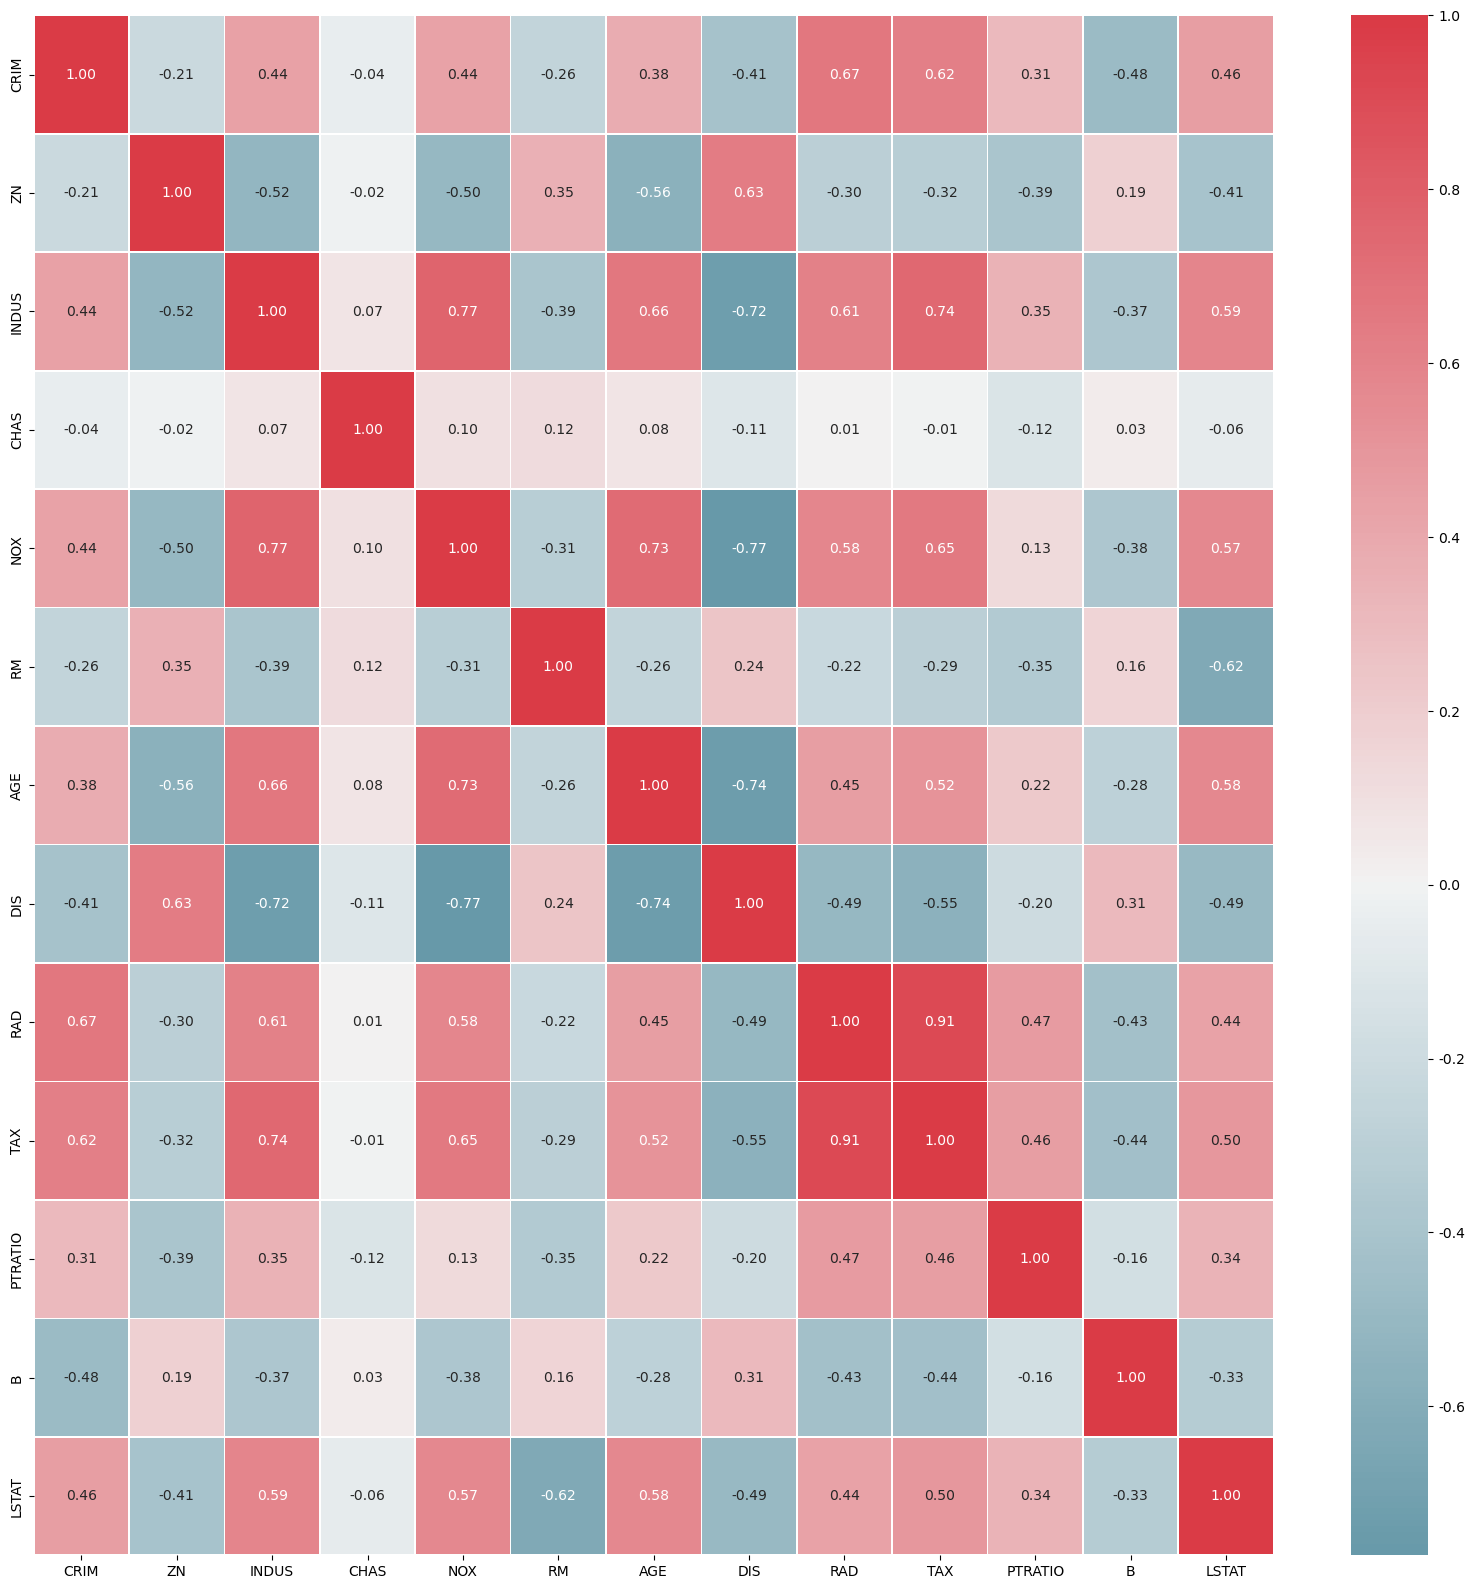

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns   
import scipy as sp  
from matplotlib import rc 
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(20,20))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data = X_train_scaled.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap=cmap, center=0)

In [25]:
X_train_scaled.drop(['INDUS','AGE'], axis=1, inplace=True)

import statsmodels.api as sm

feature_add = sm.add_constant(X_train_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_train , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     82.83
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           2.01e-89
Time:                        16:36:23   Log-Likelihood:                -1068.1
No. Observations:                 354   AIC:                             2160.
Df Residuals:                     342   BIC:                             2207.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.8581      2.832     10.189      0.000      23.287      34.429
CRIM          -8.3679      3.742     -2.236      0.026     -15.728      -1.008
ZN             6.3764      1.688      3.778      0.000       3.057       9.696
CHAS           3.1058      1.140      2.725      0.007       0.864       5.347
NOX           -9.0737      2.143     -4.233      0.000     -13.290      -4.858
RM            17.5946      2.587      6.801      0.000      12.506      22.683
DIS          -19.6851      2.592     -7.596      0.000     -24.783     -14.588
RAD            7.9210      1.890      4.191      0.000       4.204      11.638
TAX           -6.9491      2.277     -3.052      0.002     -11.428      -2.470
PTRATIO       -7.8331      1.439     -5.445      0.000     -10.663      -5.003
B              4.1010      1.389      2.952      0.003       1.369       6.833
LSTAT        -20.1964      2.073     -9.741      0.000     -24.275     -16.118
==============================================================================
Omnibus:                      112.572   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              377.664
Skew:                           1.405   Prob(JB):                     9.80e-83
Kurtosis:                       7.208   Cond. No.                         28.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# X_train_scaled = X_data

def feature_engineering_XbyVIF(X_train_scaled):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train_scaled.values,i)
                            for i in range(X_train_scaled.shape[1])]
    vif["Feature"] = X_train_scaled.columns
    return vif
vif = feature_engineering_XbyVIF(X_train_scaled)
print(vif)

    VIF_Factor  Feature
0     2.491236     CRIM
1     2.658422       ZN
2     1.128780     CHAS
3     9.667758      NOX
4    14.087421       RM
5     7.134158      DIS
6    13.819546      RAD
7    20.301328      TAX
8    13.049350  PTRATIO
9    16.401974        B
10    6.746044    LSTAT


In [27]:
X_train_scaled.drop(['TAX'], axis=1, inplace=True)

import statsmodels.api as sm

feature_add = sm.add_constant(X_train_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_train , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     88.05
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           1.97e-88
Time:                        16:36:51   Log-Likelihood:                -1072.9
No. Observations:                 354   AIC:                             2168.
Df Residuals:                     343   BIC:                             2210.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.8331      2.846      9.779      0.000      22.235      33.431
CRIM          -7.8778      3.783     -2.082      0.038     -15.319      -0.436
ZN             5.3572      1.674      3.200      0.002       2.064       8.650
CHAS           3.3101      1.151      2.875      0.004       1.045       5.575
NOX          -10.6190      2.108     -5.038      0.000     -14.765      -6.473
RM            18.4504      2.603      7.089      0.000      13.331      23.570
DIS          -18.6188      2.599     -7.164      0.000     -23.731     -13.507
RAD            3.4615      1.213      2.854      0.005       1.076       5.847
PTRATIO       -8.5731      1.435     -5.974      0.000     -11.396      -5.750
B              4.3493      1.403      3.099      0.002       1.589       7.110
LSTAT        -20.3293      2.098     -9.690      0.000     -24.456     -16.203
==============================================================================
Omnibus:                      103.831   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              323.547
Skew:                           1.318   Prob(JB):                     5.53e-71
Kurtosis:                       6.871   Cond. No.                         27.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# X_train_scaled = X_data

def feature_engineering_XbyVIF(X_train_scaled):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train_scaled.values,i)
                            for i in range(X_train_scaled.shape[1])]
    vif["Feature"] = X_train_scaled.columns
    return vif
vif = feature_engineering_XbyVIF(X_train_scaled)
print(vif)

   VIF_Factor  Feature
0    2.489858     CRIM
1    2.556449       ZN
2    1.125008     CHAS
3    8.708698      NOX
4   14.068870       RM
5    7.071986      DIS
6    5.629935      RAD
7   12.346594  PTRATIO
8   16.401411        B
9    6.709452    LSTAT


In [29]:
X_train_scaled.drop(['B'], axis=1, inplace=True)

import statsmodels.api as sm

feature_add = sm.add_constant(X_train_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_train , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     94.40
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           2.15e-87
Time:                        16:37:16   Log-Likelihood:                -1077.8
No. Observations:                 354   AIC:                             2176.
Df Residuals:                     344   BIC:                             2214.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.5348      2.438     13.345      0.000      27.740      37.330
CRIM         -10.9138      3.700     -2.950      0.003     -18.191      -3.637
ZN             5.4593      1.695      3.221      0.001       2.126       8.793
CHAS           3.4608      1.165      2.971      0.003       1.170       5.752
NOX          -11.2809      2.123     -5.314      0.000     -15.457      -7.105
RM            18.0382      2.632      6.854      0.000      12.862      23.214
DIS          -18.8489      2.630     -7.167      0.000     -24.022     -13.676
RAD            3.1425      1.223      2.568      0.011       0.736       5.549
PTRATIO       -8.4554      1.452     -5.821      0.000     -11.312      -5.599
LSTAT        -20.8067      2.118     -9.822      0.000     -24.973     -16.640
==============================================================================
Omnibus:                      100.589   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              306.427
Skew:                           1.284   Prob(JB):                     2.89e-67
Kurtosis:                       6.766   Cond. No.                         21.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# X_train_scaled = X_data

def feature_engineering_XbyVIF(X_train_scaled):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train_scaled.values,i)
                            for i in range(X_train_scaled.shape[1])]
    vif["Feature"] = X_train_scaled.columns
    return vif
vif = feature_engineering_XbyVIF(X_train_scaled)
print(vif)

   VIF_Factor  Feature
0    2.384751     CRIM
1    2.555491       ZN
2    1.121892     CHAS
3    8.401502      NOX
4   10.261007       RM
5    6.606465      DIS
6    5.424200      RAD
7   11.126322  PTRATIO
8    6.498955    LSTAT


In [31]:
X_train_scaled.drop(['PTRATIO'], axis=1, inplace=True)

import statsmodels.api as sm

feature_add = sm.add_constant(X_train_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_train , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     93.09
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           1.95e-81
Time:                        16:37:32   Log-Likelihood:                -1094.4
No. Observations:                 354   AIC:                             2207.
Df Residuals:                     345   BIC:                             2242.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.4799      2.214     11.508      0.000      21.125      29.835
CRIM          -9.7737      3.867     -2.528      0.012     -17.379      -2.168
ZN             8.9213      1.661      5.371      0.000       5.655      12.188
CHAS           3.9151      1.216      3.219      0.001       1.523       6.307
NOX           -7.0858      2.090     -3.390      0.001     -11.196      -2.975
RM            20.4556      2.720      7.521      0.000      15.106      25.805
DIS          -19.3629      2.751     -7.038      0.000     -24.774     -13.952
RAD           -0.2255      1.128     -0.200      0.842      -2.445       1.994
LSTAT        -22.3998      2.198    -10.189      0.000     -26.724     -18.076
==============================================================================
Omnibus:                       88.594   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.487
Skew:                           1.193   Prob(JB):                     4.00e-50
Kurtosis:                       6.119   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# X_train_scaled = X_data

def feature_engineering_XbyVIF(X_train_scaled):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train_scaled.values,i)
                            for i in range(X_train_scaled.shape[1])]
    vif["Feature"] = X_train_scaled.columns
    return vif
vif = feature_engineering_XbyVIF(X_train_scaled)
print(vif)

   VIF_Factor Feature
0    2.380386    CRIM
1    2.143519      ZN
2    1.117974    CHAS
3    8.250182     NOX
4    8.314858      RM
5    5.754556     DIS
6    4.426283     RAD
7    5.288356   LSTAT


In [33]:
X_train_scaled.drop(['RAD'], axis=1, inplace=True)

import statsmodels.api as sm

feature_add = sm.add_constant(X_train_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_train , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     106.7
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           1.85e-82
Time:                        16:37:50   Log-Likelihood:                -1094.4
No. Observations:                 354   AIC:                             2205.
Df Residuals:                     346   BIC:                             2236.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.4718      2.211     11.523      0.000      21.124      29.820
CRIM         -10.1929      3.244     -3.142      0.002     -16.573      -3.813
ZN             8.9295      1.658      5.386      0.000       5.668      12.191
CHAS           3.9186      1.214      3.227      0.001       1.530       6.307
NOX           -7.2112      1.991     -3.622      0.000     -11.127      -3.296
RM            20.4312      2.713      7.530      0.000      15.095      25.768
DIS          -19.3636      2.747     -7.048      0.000     -24.767     -13.960
LSTAT        -22.4049      2.195    -10.206      0.000     -26.723     -18.087
==============================================================================
Omnibus:                       87.362   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.677
Skew:                           1.182   Prob(JB):                     7.30e-49
Kurtosis:                       6.073   Cond. No.                         17.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# X_train_scaled = X_data

def feature_engineering_XbyVIF(X_train_scaled):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train_scaled.values,i)
                            for i in range(X_train_scaled.shape[1])]
    vif["Feature"] = X_train_scaled.columns
    return vif
vif = feature_engineering_XbyVIF(X_train_scaled)
print(vif)

   VIF_Factor Feature
0    1.679428    CRIM
1    2.141674      ZN
2    1.117745    CHAS
3    7.342849     NOX
4    8.220655      RM
5    5.753382     DIS
6    5.284614   LSTAT


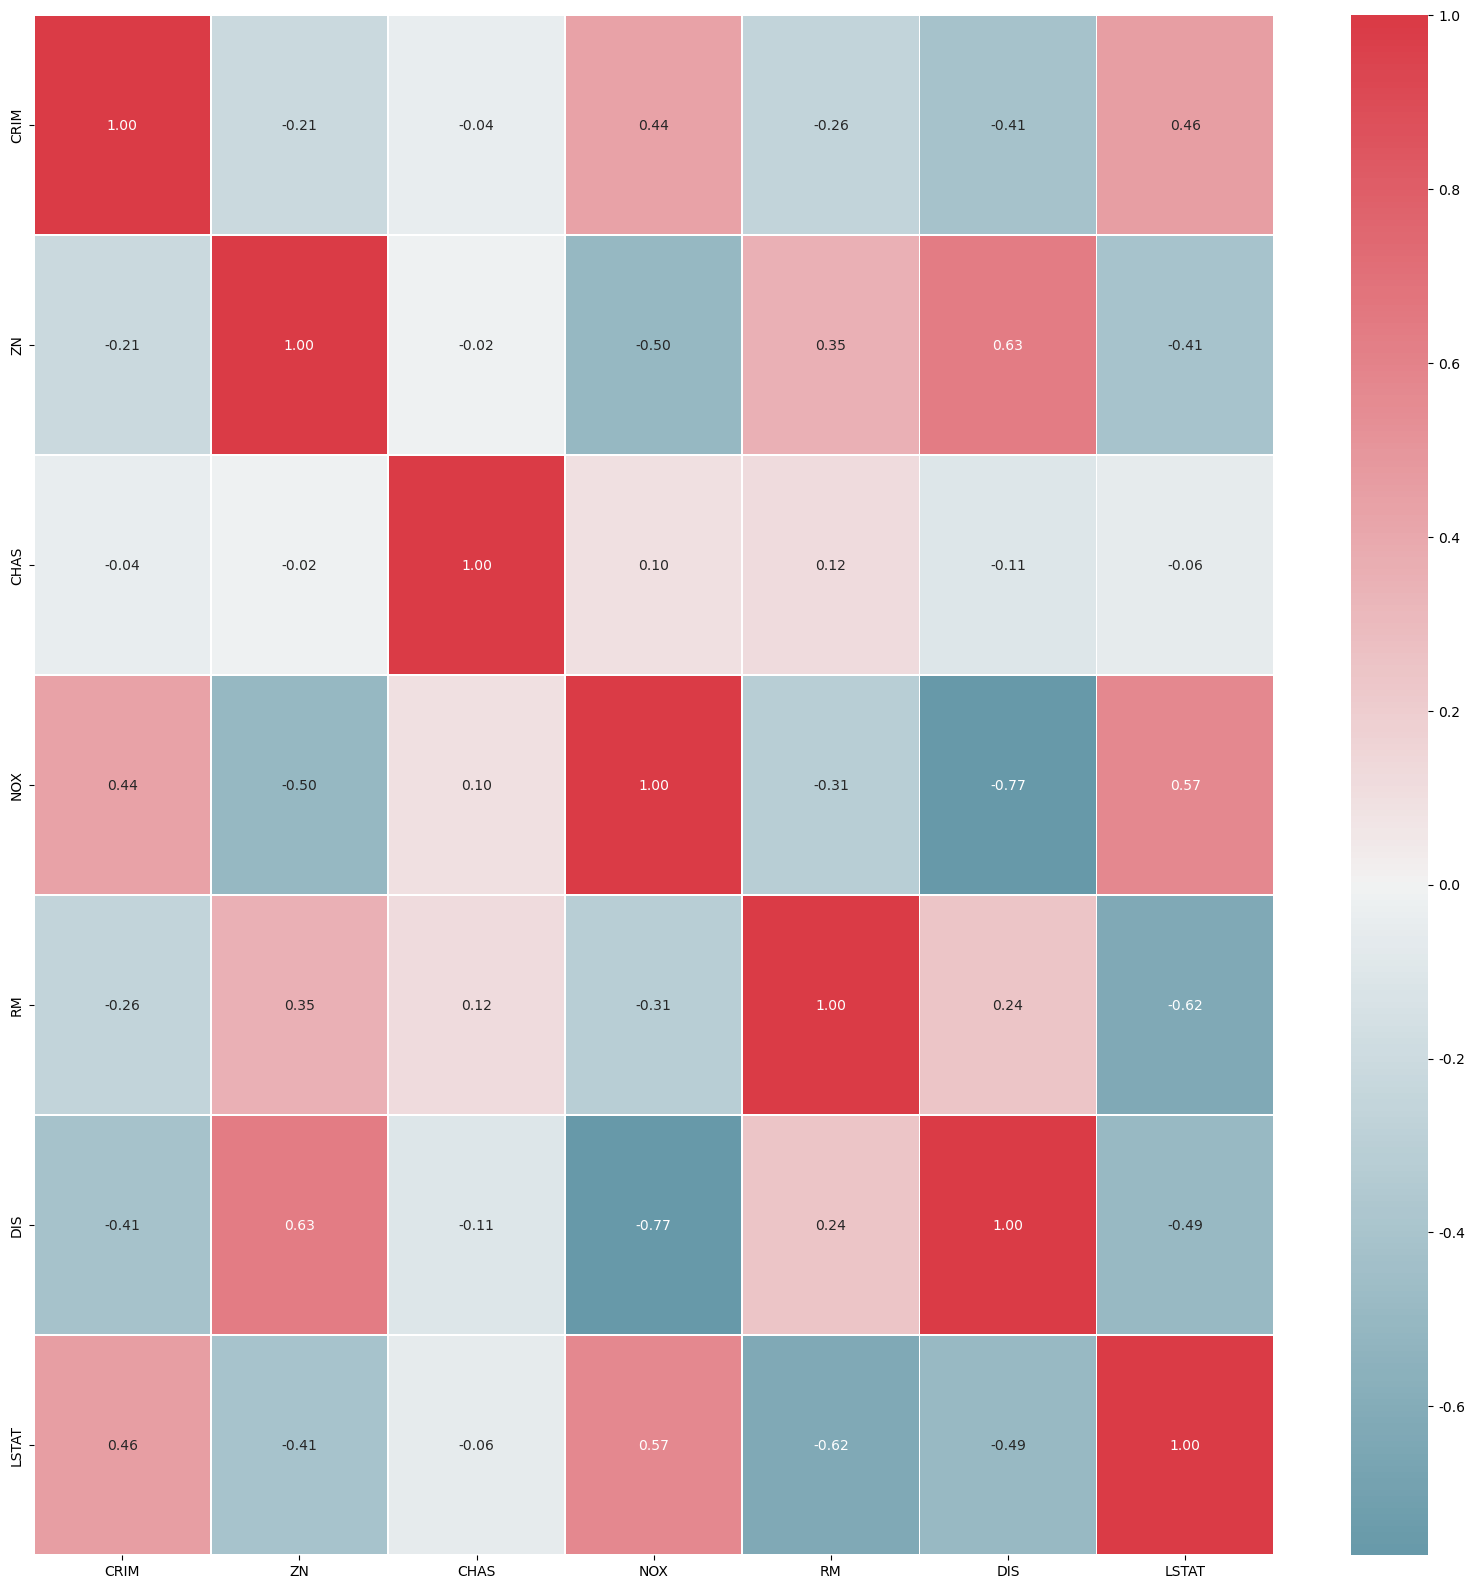

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns   
import scipy as sp  
from matplotlib import rc 
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(20,20))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data = X_train_scaled.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap=cmap, center=0)

In [38]:
X_train_scaled.columns
X_test_scaled= X_test_scaled[['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'LSTAT']]

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_preds = lr.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse,rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test,y_preds)))

print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_,4))

MSE : 21.129, RMSE : 4.597
Variance score : 0.703
절편 값: 25.47181922531778
회귀 계수값: [-10.1929   8.9295   3.9186  -7.2112  20.4312 -19.3636 -22.4049]
